# 로지스틱 회귀 연습분제
## 문제 1
피마 인디언 당뇨병 발병여부를 예측할 수 있는 분석 모델을 구현하기 위해 아래와 같은 항목들을 조사하였다. 분석하라.

|변수|	설명|
|--|--|
|Pregnancies	|임신횟수|
|Glucose	|포도당 부하 검사 수치|
|BloodPressure|	혈압|
|SkinThickness|	팔 삼두근 뒤쪽의 피하지방 측정값|
|Insulin	|혈청 인슐린|
|BMI|	체질량 지수|
|DiabetesPedigreeFunction|	당뇨 내력 가중치 값|
|Age	|나이|
|Outcome|	당뇨여부(0 또는 1)|

단, 모든 독립변수는 명목형 변수를 포함하지 않으며 정규분포를 만족한다고 가정한다.

In [1]:
import pandas as pd
from statsmodels.formula.api import logit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, f1_score,recall_score
from patsy import dmatrix
import seaborn as sb
from matplotlib import pyplot as plt
import numpy as np
import sys


### 데이터 불러오기 


In [2]:
df = pd.read_excel("https://data.hossam.kr/E05/indian_diabetes.xlsx")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 데이터 전처리 

In [3]:
## 데이터 표준화 ㄱㄱ 

scaler = StandardScaler()
df['Pregnancies']= scaler.fit_transform(df[['Pregnancies']])
df['Glucose']= scaler.fit_transform(df[['Glucose']])
df['BloodPressure']= scaler.fit_transform(df[['BloodPressure']])
df['SkinThickness']= scaler.fit_transform(df[['SkinThickness']])
df['Insulin']= scaler.fit_transform(df[['Insulin']])
df['BMI']= scaler.fit_transform(df[['BMI']])
df['DiabetesPedigreeFunction']= scaler.fit_transform(df[['DiabetesPedigreeFunction']])
df['Age']= scaler.fit_transform(df[['Age']])

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1


### 로지스틱 회귀분석 진행

In [4]:
model = logit('Outcome ~ Pregnancies + Glucose + BloodPressure +SkinThickness + Insulin + BMI + DiabetesPedigreeFunction + Age',data = df)
fit = model.fit()

print(fit.summary())
### 설명력 0.2718

Optimization terminated successfully.
         Current function value: 0.470993
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      759
Method:                           MLE   Df Model:                            8
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.2718
Time:                        13:12:07   Log-Likelihood:                -361.72
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 9.652e-54
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.8711      0.097     -8.986      0.000      -1.061

In [5]:
### 로지스틱 회귀 설명력 
fit.prsquared

0.27180966859224587

In [6]:
### 예측결과를 데이터 프레임에 추가 
df['예측값'] = fit.predict(df.drop('Outcome',axis=1))
df['예측결과'] =df['예측값'] > 0.5 

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,예측값,예측결과
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1,0.721727,True
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0,0.048642,False
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1,0.796702,True
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0,0.041625,False
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1,0.902184,True
...,...,...,...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136,0,0.317115,False
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023,0,0.318969,False
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0,0.170416,False
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1,0.284976,False


In [7]:
### 혼동행렬 구하기

cm = confusion_matrix(df['Outcome'],df['예측결과'])
# print(cm.ravel())
tn,fp,fn,tp = cm.ravel()
cmdf = pd.DataFrame(cm,index = ['False','True'], columns=['Negative','Positive'])
cmdf

,Negative,Positive
False,445,55
True,112,156


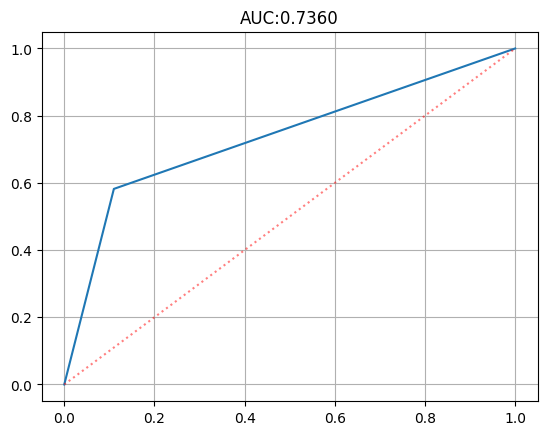

In [8]:
### ROC Curve 시각솨

ras = roc_auc_score(df['Outcome'],df['예측결과'])

fpr, tpr, threshold = roc_curve(df['Outcome'],df['예측결과'])
plt.figure()
sb.lineplot(x=fpr,y=tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.title("AUC:{:.4f}".format(ras))
plt.grid()
plt.show()
plt.close()

## 문제 2
다음의 데이터는 타이타닉 탑승객 명단 데이터이다. 적절한 데이터 전처리와 정제를 수행한 후 분석하라.

|변수명|	설명|
|--|--|
|PassengerId|	탑승객의 ID(인덱스와 같은 개념)
|Survived|	생존유무(0은 사망 1은 생존)|
|Pclass	|객실의 등급|
|Name|	이름|
|Sex	|성별|
|SibSp	|동승한 형제 혹은 배우자의 수|
|Parch	|동승한 자녀 혹은 부모의 수|
|Ticket	|티켓번호|
|Fare	|요금|
|Cabin	|선실|
|Embarked|	탑승지 (C = Cherbourg, Q = Queenstown, S = Southampton)|

### 데이터 불러오기 


In [9]:
df = pd.read_excel("https://data.hossam.kr/E05/titanic.xlsx")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 데이터 확인
- 필요없는 칼럼 제거 : PassengerId , Name ,Ticket
----------------------------------------------------
- 종속변수 : Survived
- 명목형 : Pclass, Sex, Cabin, Embarked
- 연속형 : Age, SibSp, Parch, Fare
------------------------------------------------



In [10]:
### 필요없는 칼럼 제거

df = df.drop(['PassengerId','Name','Ticket'],axis=1)

In [11]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [12]:
df['Age'].mean()

29.69911764705882

In [13]:
### 결측치 확인 
df.isnull().sum()
#  cabin 은 결측치 너무 많음 -> 없앰 



df = df.drop('Cabin',axis=1)


In [14]:
## Age 평균으로 대체 ,


mean_age = df['Age'].mean()

df.loc[df['Age'].isnull(),"Age"] = mean_age

In [15]:
## embark : 최빈값으로 대체 
mode_embark = df['Embarked'].mode()
print(mode_embark)
df.loc[df['Embarked'].isnull(),"Embarked"] ="S"

0    S
Name: Embarked, dtype: object


In [16]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### 데이터 전처리 
- 종속변수 : Survived
- 명목형 : Pclass, Sex, Cabin, Embarked
- 연속형 : Age, SibSp, Parch, Fare

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
### 표준화 
scaler = StandardScaler()
df['Age'] = scaler.fit_transform(df[['Age']])
df['SibSp'] = scaler.fit_transform(df[['SibSp']])
df['Parch'] = scaler.fit_transform(df[['Parch']])
df['Fare'] = scaler.fit_transform(df[['Fare']])
df


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,-0.592481,0.432793,-0.473674,-0.502445,S
1,1,1,female,0.638789,0.432793,-0.473674,0.786845,C
2,1,3,female,-0.284663,-0.474545,-0.473674,-0.488854,S
3,1,1,female,0.407926,0.432793,-0.473674,0.420730,S
4,0,3,male,0.407926,-0.474545,-0.473674,-0.486337,S
...,...,...,...,...,...,...,...,...
886,0,2,male,-0.207709,-0.474545,-0.473674,-0.386671,S
887,1,1,female,-0.823344,-0.474545,-0.473674,-0.044381,S
888,0,3,female,0.000000,0.432793,2.008933,-0.176263,S
889,1,1,male,-0.284663,-0.474545,-0.473674,-0.044381,C


In [19]:
## 더미변수 변환 전 데이터 형 변환
## 카테고리로 변환 ㄱㄱ 
## 추론적 데이터 분석에서는 원래대록ㄱㄱ 

eda_df = df.astype({"Survived":'category',"Pclass":'category',"Sex":'category',"Embarked":'category'})
eda_df.info()
## 기초통계량 확인
eda_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    float64 
 5   Parch     891 non-null    float64 
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(4), float64(4)
memory usage: 32.0 KB


,Age,SibSp,Parch,Fare
count,8.910000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,2.232906e-16,4.386066e-17,5.382900e-17,3.987333e-18
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-2.253155e+00,-4.745452e-01,-4.736736e-01,-6.484217e-01
25%,-5.924806e-01,-4.745452e-01,-4.736736e-01,-4.891482e-01
50%,0.000000e+00,-4.745452e-01,-4.736736e-01,-3.573909e-01
75%,4.079260e-01,4.327934e-01,-4.736736e-01,-2.424635e-02
max,3.870872e+00,6.784163e+00,6.974147e+00,9.667167e+00


In [20]:
### 명목형 변수의 더미변수화 
df2 = pd.get_dummies(df,columns=['Pclass','Sex','Embarked'],drop_first=True)
df2

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,-0.592481,0.432793,-0.473674,-0.502445,False,True,True,False,True
1,1,0.638789,0.432793,-0.473674,0.786845,False,False,False,False,False
2,1,-0.284663,-0.474545,-0.473674,-0.488854,False,True,False,False,True
3,1,0.407926,0.432793,-0.473674,0.420730,False,False,False,False,True
4,0,0.407926,-0.474545,-0.473674,-0.486337,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...
886,0,-0.207709,-0.474545,-0.473674,-0.386671,True,False,True,False,True
887,1,-0.823344,-0.474545,-0.473674,-0.044381,False,False,False,False,True
888,0,0.000000,0.432793,2.008933,-0.176263,False,True,False,False,True
889,1,-0.284663,-0.474545,-0.473674,-0.044381,False,False,True,False,False


In [21]:
model = logit('Survived ~ Age + SibSp + Parch +Fare + Pclass_2 + Pclass_3 + Sex_male + Embarked_Q +Embarked_S ',data = df2)
fit = model.fit()

print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.440153
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.3390
Time:                        13:12:09   Log-Likelihood:                -392.18
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.420e-81
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8113      0.315      8.917      0.000       2.193       3.429
Pclas

In [22]:
### 로지스틱 회귀 설명력 
fit.prsquared

0.33902209558002816

In [23]:
### 예측결과를 데이터 프레임에 추가 
df2['예측값'] = fit.predict(df2.drop('Survived',axis=1))
df2['예측결과'] = df2['예측값']>0.5
df2

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,예측값,예측결과
0,0,-0.592481,0.432793,-0.473674,-0.502445,False,True,True,False,True,0.084987,False
1,1,0.638789,0.432793,-0.473674,0.786845,False,False,False,False,False,0.921244,True
2,1,-0.284663,-0.474545,-0.473674,-0.488854,False,True,False,False,True,0.625032,True
3,1,0.407926,0.432793,-0.473674,0.420730,False,False,False,False,True,0.890425,True
4,0,0.407926,-0.474545,-0.473674,-0.486337,False,True,True,False,True,0.071804,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,-0.207709,-0.474545,-0.473674,-0.386671,True,False,True,False,True,0.266745,False
887,1,-0.823344,-0.474545,-0.473674,-0.044381,False,False,False,False,True,0.952161,True
888,0,0.000000,0.432793,2.008933,-0.176263,False,True,False,False,True,0.471149,False
889,1,-0.284663,-0.474545,-0.473674,-0.044381,False,False,True,False,False,0.607858,True


In [24]:
## 혼동행렬 구학 ㅣ
cm = confusion_matrix(df2['Survived'],df2['예측결과'])
tn,fp,fn,tp = cm.ravel()

cmdf = pd.DataFrame(cm,index = ['False','True'], columns=['Negative','Positive'])
cmdf

,Negative,Positive
False,476,73
True,102,240


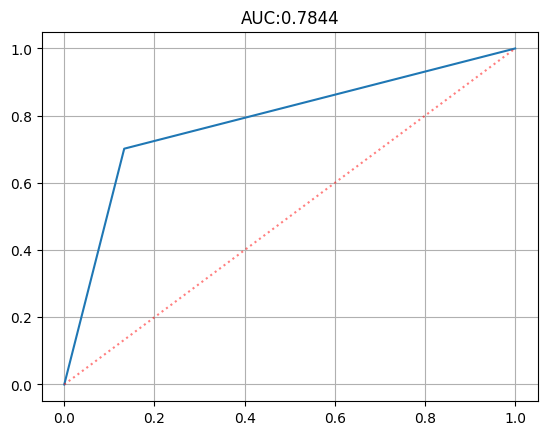

In [25]:
### ROC Curve 시각솨

ras = roc_auc_score(df2['Survived'],df2['예측결과'])

fpr, tpr, threshold = roc_curve(df2['Survived'],df2['예측결과'])
plt.figure()
sb.lineplot(x=fpr,y=tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.title("AUC:{:.4f}".format(ras))
plt.grid()
plt.show()
plt.close()

In [26]:
## 정확도 
acc = accuracy_score(df2['Survived'],df2['예측결과'])
## 정밀도
precision = precision_score(df2['Survived'],df2['예측결과'])
## 재현율 
recall = recall_score(df2['Survived'],df2['예측결과'])
# F1- score 
F1 =f1_score(df2['Survived'],df2['예측결과'])

# 위양성율 
fallout  = spe = fp/(fp+tn)

# 특이성 
spe = 1- fallout

result_df = pd.DataFrame({'설명력(Pseudo-Rsqe)': [fit.prsquared], '정확도(Accuracy)':[acc], '정밀도(Precision)':[precision], '재현율(Recall, TPR)':[recall], '위양성율(Fallout, FPR)': [fallout], '특이성(Specificity, TNR)':[spe],'RAS':[ras], 'f1_score':[F1]})

In [27]:
result_df

,설명력(Pseudo-Rsqe),정확도(Accuracy),정밀도(Precision),"재현율(Recall, TPR)","위양성율(Fallout, FPR)","특이성(Specificity, TNR)",RAS,f1_score
0,0.339022,0.803591,0.766773,0.701754,0.132969,0.867031,0.784393,0.732824


In [28]:
df = pd.read_excel("https://data.hossam.kr/E05/titanic.xlsx")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.unicode_minus"] = False

In [30]:
## 결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
# 결측치 정제 
## 객실번호
## 객실번호는 생존여부에 상관이 없을것으로 판단 -> 제거
df_tmp = df[['Pclass','Cabin']].query("Cabin.isnull()")
df_tmp.fillna(0,inplace=True)

df_tmp.groupby('Pclass').count()


,Cabin
Pclass,
1,40
2,168
3,479


In [34]:
df1 =df.drop("Cabin",axis=1)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [47]:
## 탑승지 결측치는 2건밖애 안됌
df2 = df1.query("Embarked.notnull()")
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


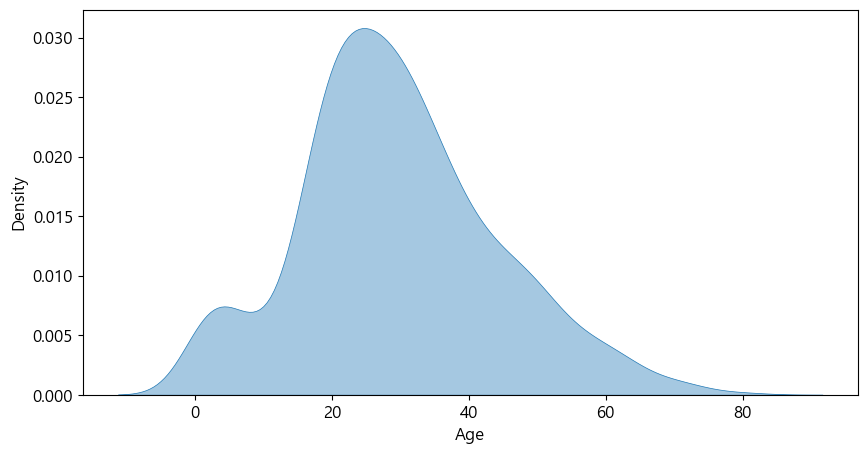

In [48]:
## 나이 
## 커널밀도함수 그래프 - 연령분포에 대해
plt.rcParams["font.size"] = 12

plt.figure(figsize=(10, 5))

sb.kdeplot(data=df2, x="Age",fill = True , alpha= 0.4,linewidth= 0.5)
plt.show()
plt.close()
## 2~40대 사이에 연령층이 가장 많이 분포되어 있음. 
## 60세보다는 10세 미만의 아이들이 더 많이 탑승


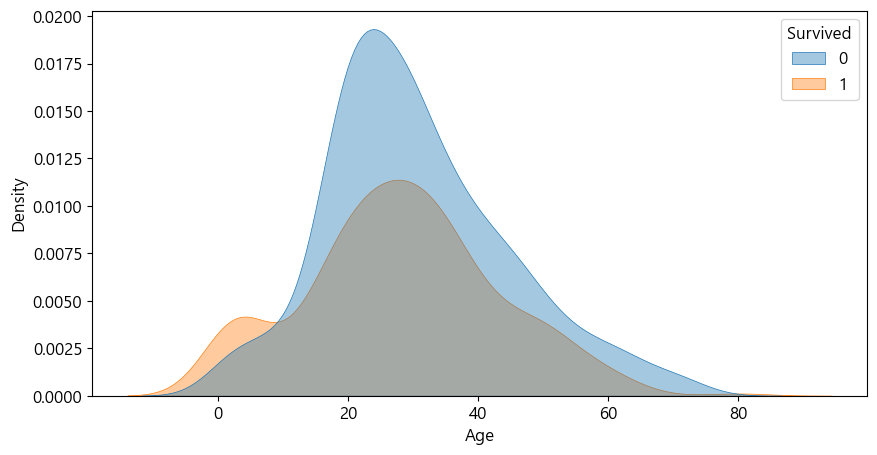

In [49]:
plt.rcParams["font.size"] = 12

plt.figure(figsize=(10, 5))
sb.kdeplot(data=df2,x="Age",hue="Survived",fill=True,alpha = 0.4, linewidth=0.5)
plt.show()
plt.close()

## 나이의 경우 탑승객의 생존여부에 영향을 미치는 요인이라고 
## 판단하고 삭제 x

## 중앙값으로 대체 

In [50]:
df3 = df2.copy()
df3['Age'].fillna(df3['Age'].median(), inplace=True)
df3.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [51]:
df4 = df3.set_index("PassengerId")
df4.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [58]:

df5 = df4.drop(['Name', 'Ticket'], axis=1)
df5.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [59]:
## 더미변수 

cdf = pd.get_dummies(df5, columns=['Pclass', 'Sex', 'Embarked'],drop_first=True, dtype = "int")


In [60]:
df5

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [61]:
eda_df = df5.astype({'Survived':'category', 'Pclass': 'category', 'Sex': 'category', 'Embarked': 'category'})
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  889 non-null    category
 1   Pclass    889 non-null    category
 2   Sex       889 non-null    category
 3   Age       889 non-null    float64 
 4   SibSp     889 non-null    int64   
 5   Parch     889 non-null    int64   
 6   Fare      889 non-null    float64 
 7   Embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 38.7 KB


In [62]:

eda_df.describe()

,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000
mean,29.315152,0.524184,0.382452,32.096681
std,12.984932,1.103705,0.806761,49.697504
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


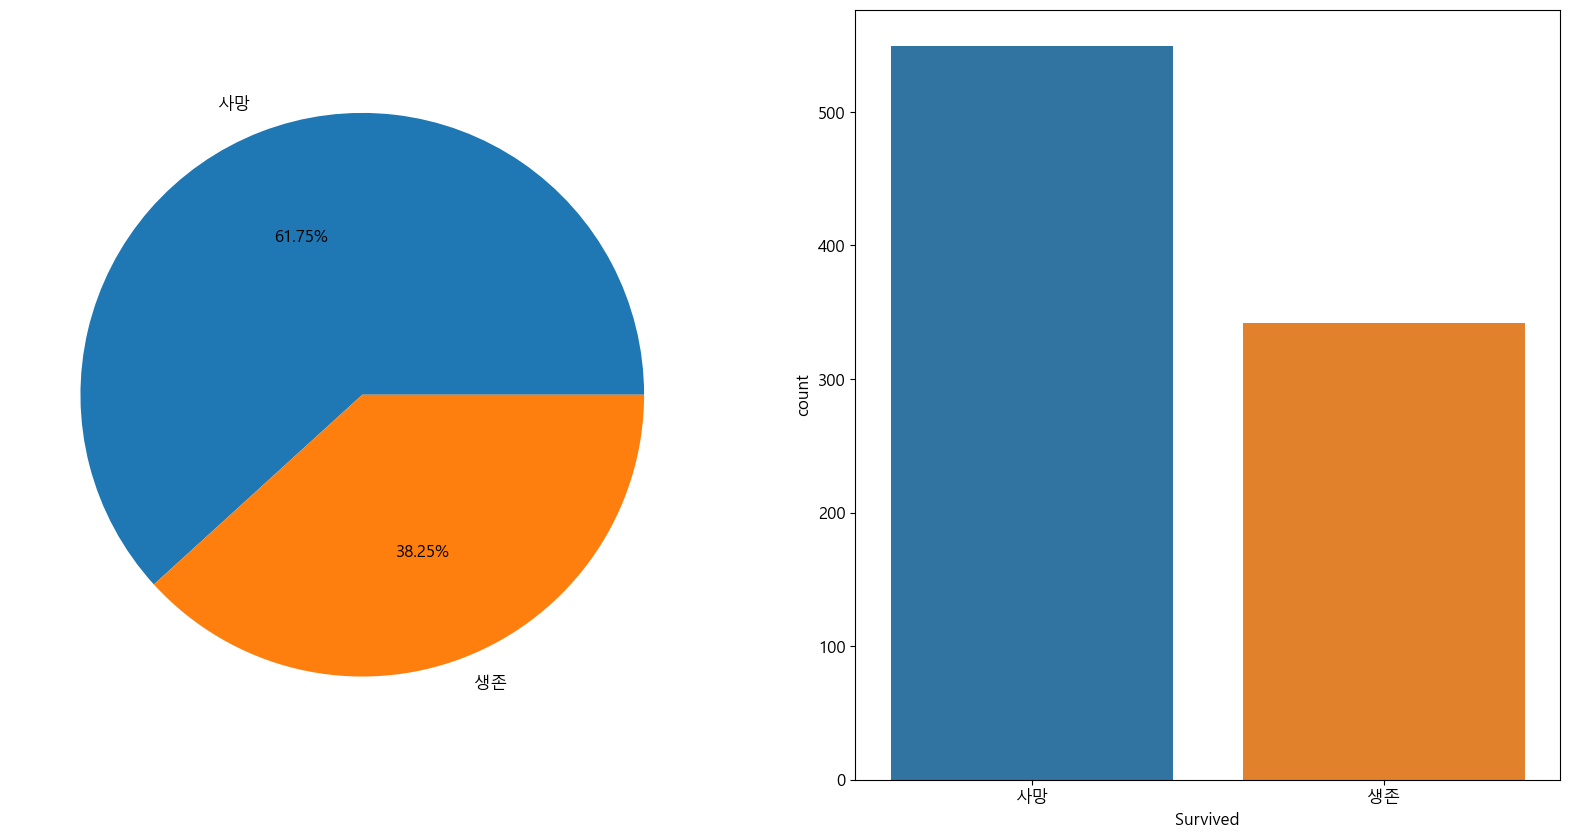

In [68]:
## 생존률 확인하기

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10),dpi = 100)
vc = eda_df['Survived'].value_counts()
ax1.pie(vc,labels = ['사망','생존'],autopct='%1.2f%%')

sb.countplot(x=df['Survived'],ax=ax2)
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['사망', '생존'])

plt.show()
plt.close()

In [69]:
eda_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [72]:
pclass_df = eda_df[["Pclass",'Survived']].groupby("Pclass").count()
pclass_df

,Survived
Pclass,
1,214
2,184
3,491


In [80]:
## 각 선실별 생존자

survive_df = eda_df.loc[eda_df['Survived']==1,['Pclass',"Survived"]].groupby('Pclass').count()
survive_df

,Survived
Pclass,
1,134
2,87
3,119


In [84]:
ratio = (survive_df['Survived'] / pclass_df['Survived']) * 100
ratio

Pclass
1    62.616822
2    47.282609
3    24.236253
Name: Survived, dtype: float64

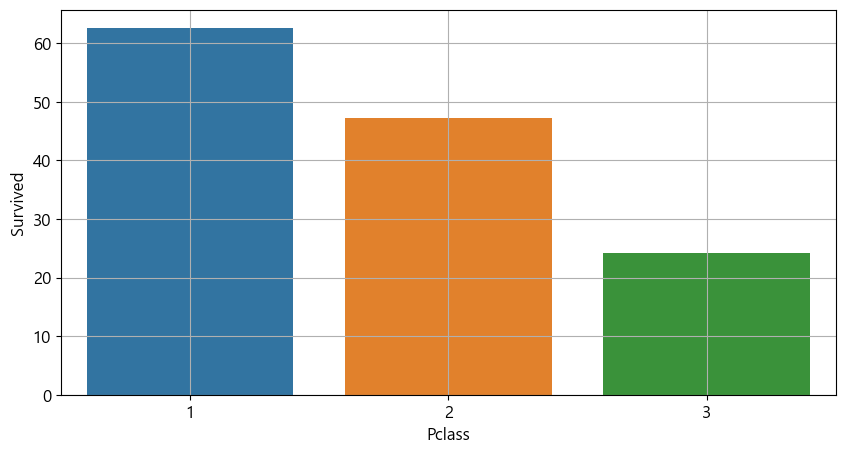

In [86]:
plt.figure()
sb.barplot(x=ratio.index,y=ratio)
plt.grid()
plt.ylabel('Survived')
plt.show()
plt.close()
##부유층이 많이 탑승했을 것으로 예상되는 1등급 객실의 생존비율이 가장 높은 것을 알 수 있다.

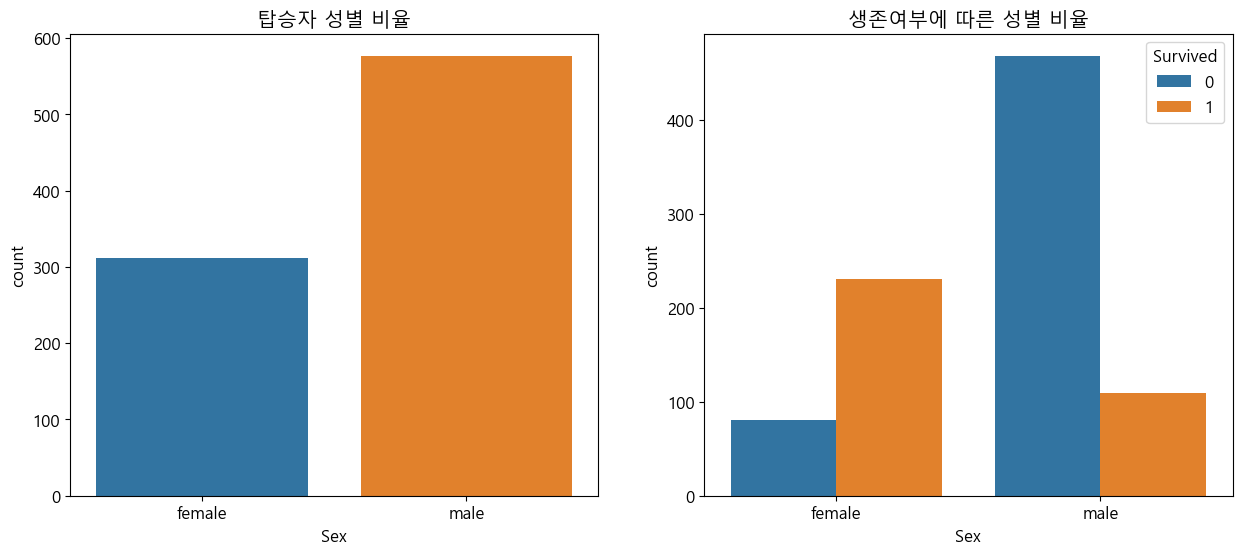

In [89]:
## 성별에 따른 생존률
f,ax = plt.subplots(1,2,figsize=(15,6))
sb.countplot(x='Sex',data=eda_df,ax=ax[0])
ax[0].set_title('탑승자 성별 비율')
sb.countplot(x="Sex",data=eda_df,ax=ax[1],hue="Survived")
ax[1].set_title('생존여부에 따른 성별 비율')
plt.show()
plt.close()

In [92]:
## 로지스틱 회귀 
df5

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000,S
888,1,1,female,19.0,0,0,30.0000,S
889,0,3,female,28.0,1,2,23.4500,S


In [94]:
cdf

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,1,0,1
2,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,1
5,0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,1,0,1,0,1
888,1,19.0,0,0,30.0000,0,0,0,0,1
889,0,28.0,1,2,23.4500,0,1,0,0,1


In [95]:
model = logit('Survived ~ Age + SibSp + Parch +Fare + Pclass_2 + Pclass_3 + Sex_male + Embarked_Q +Embarked_S ',data = cdf)

fit = model.fit()

print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.441182
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  889
Model:                          Logit   Df Residuals:                      879
Method:                           MLE   Df Model:                            9
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.3368
Time:                        14:00:28   Log-Likelihood:                -392.21
converged:                       True   LL-Null:                       -591.41
Covariance Type:            nonrobust   LLR p-value:                 3.013e-80
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0625      0.473      8.594      0.000       3.136       4.989
Age           -0.0388      0.

In [99]:
### 로지스틱 회귀 설명력 
fit.prsquared
cdf

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,예측값,예측결과
PassengerId,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,1,0,1,0.084062,False
2,1,38.0,1,0,71.2833,0,0,0,0,0,0.919359,True
3,1,26.0,0,0,7.9250,0,1,0,0,1,0.619862,True
4,1,35.0,1,0,53.1000,0,0,0,0,1,0.887743,True
5,0,35.0,0,0,8.0500,0,1,1,0,1,0.071106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,1,0,1,0,1,0.265766,False
888,1,19.0,0,0,30.0000,0,0,0,0,1,0.950508,True
889,0,28.0,1,2,23.4500,0,1,0,0,1,0.486031,False


In [100]:
### 예측결과를 데이터 프레임에 추가 
cdf['예측값'] = fit.predict(cdf.drop("Survived",axis=1))
cdf['예측결과']= cdf['예측값']>0.5

In [102]:
cdf

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,예측값,예측결과
PassengerId,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,1,1,0,1,0.084062,False
2,1,38.0,1,0,71.2833,0,0,0,0,0,0.919359,True
3,1,26.0,0,0,7.9250,0,1,0,0,1,0.619862,True
4,1,35.0,1,0,53.1000,0,0,0,0,1,0.887743,True
5,0,35.0,0,0,8.0500,0,1,1,0,1,0.071106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,27.0,0,0,13.0000,1,0,1,0,1,0.265766,False
888,1,19.0,0,0,30.0000,0,0,0,0,1,0.950508,True
889,0,28.0,1,2,23.4500,0,1,0,0,1,0.486031,False


In [103]:
## 혼동행렬

cm = confusion_matrix(cdf['Survived'],cdf['예측결과'])
tn,fp,fn,tp = cm.ravel()
cmdf = pd.DataFrame(cm,index = ['False','True'], columns=['Negative','Positive'])
cmdf


,Negative,Positive
False,478,71
True,102,238


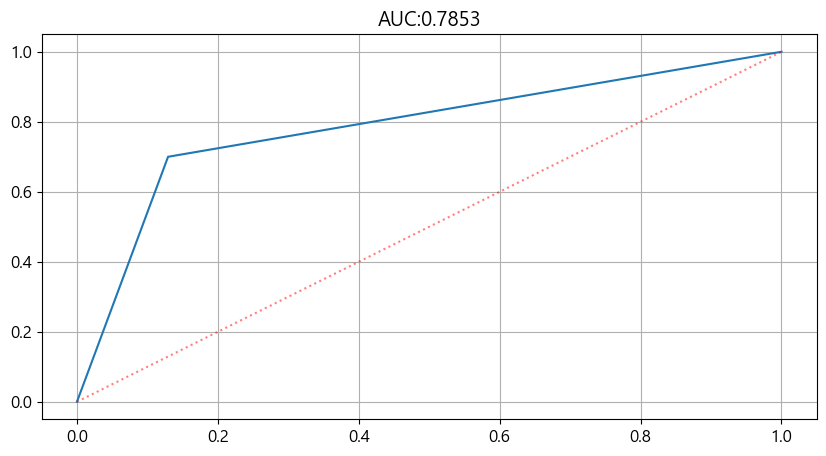

In [105]:
### ROC Curve 시각솨

ras = roc_auc_score(cdf['Survived'],cdf['예측결과'])

fpr, tpr, threshold = roc_curve(cdf['Survived'],cdf['예측결과'])
plt.figure()
sb.lineplot(x=fpr,y=tpr)
sb.lineplot(x=[0,1], y=[0,1], color='red', linestyle=':', alpha=0.5)
plt.title("AUC:{:.4f}".format(ras))
plt.grid()
plt.show()
plt.close()

In [106]:
## 정확도 
acc = accuracy_score(cdf['Survived'],cdf['예측결과'])
## 정밀도
precision = precision_score(cdf['Survived'],cdf['예측결과'])
## 재현율 
recall = recall_score(cdf['Survived'],cdf['예측결과'])
# F1- score 
F1 =f1_score(cdf['Survived'],cdf['예측결과'])

# 위양성율 
fallout  = spe = fp/(fp+tn)

# 특이성 
spe = 1- fallout

result_df = pd.DataFrame({'설명력(Pseudo-Rsqe)': [fit.prsquared], '정확도(Accuracy)':[acc], '정밀도(Precision)':[precision], '재현율(Recall, TPR)':[recall], '위양성율(Fallout, FPR)': [fallout], '특이성(Specificity, TNR)':[spe],'RAS':[ras], 'f1_score':[F1]})

In [108]:
test_df = pd.DataFrame({
    'dicaprio': [19, 0, 0, 0, 0, 1, 1, 1, 0],  # 영화속 남자 주인공 데이터
    'winslet': [17, 1, 1, 100, 0, 0, 0, 0, 1], # 영화속 여자 주인공 데이터
    'me': [41, 1, 0, 60, 1, 0, 1, 1, 0]  # 임의의 데이터
}, index=['Age', 'SibSp', 'Parch', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S'])

vdf = test_df.T
vdf

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
dicaprio,19,0,0,0,0,1,1,1,0
winslet,17,1,1,100,0,0,0,0,1
me,41,1,0,60,1,0,1,1,0


In [110]:
result = fit.predict(vdf)
result

dicaprio    0.169957
winslet     0.941705
me          0.199644
dtype: float64

In [111]:
for i, v in enumerate(result.index):
    print("%s님의 생존 확률은 %.2f%% 입니다." % (v, result[i]*100))

dicaprio님의 생존 확률은 17.00% 입니다.
winslet님의 생존 확률은 94.17% 입니다.
me님의 생존 확률은 19.96% 입니다.
